In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


COLUMN_HEADER = ['Timestamp', 'Counter', 'Pressure 1', 'Pressure 2', 'Pressure 3', 'Pressure 4', 'Pressure 5', 'Pressure 6',
                 'Pressure 7', 'Temperature 1', 'Temperature 2', 'Temperature 3', 'Temperature 4', 'Temperature 5', 'Temperature 6', 'Temperature 7']

%matplotlib inline
plt.style.use('classic')
sns.set()

file = '/Users/leaschwalb/Documents/UNI/1_Bachelorarbeit/Messungen/Sommertreffen/Horst/Serial_2.plt'             
# data = np.genfromtxt(file, dtype= float, skip_header=79, usecols=(58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))  
data = np.genfromtxt(file, dtype= float, skip_header=79, usecols=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17))  
df = pd.DataFrame(data, columns = COLUMN_HEADER)

# MAX/MIN Werte Drücke -> Geschwindigkeiten 
# Abgleich Differenzdrück Kai 
# README: Jupyter Notebook PlugIn für VS Code, Conda Version (Conda list -> Liste von Librarys mit Versionsnr.), Python Version
# df.loc[(df['Pressure 1'] >= 100)]


Text(0, 0.5, 'Differenzdruck mbar')

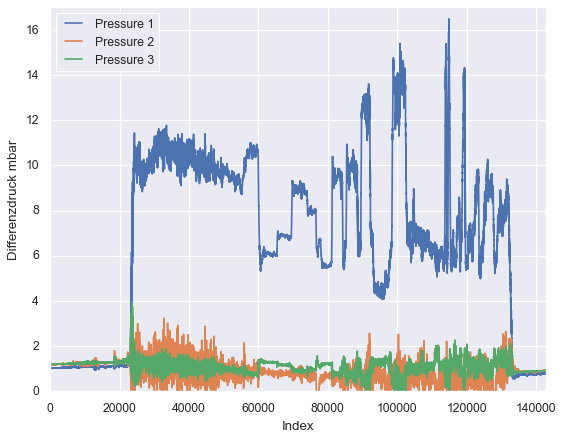

In [18]:
# Plotting Pressure over Index
for column in df.columns[2:-1]: 
    
    df[column] = df[column].div(100).round(2)
    # df.reset_index().plot(x='index', y= column, kind = 'scatter')

df.reset_index().plot(x='index', y= ['Pressure 1', 'Pressure 2', 'Pressure 3'], kind = 'line', ylim=(0, 17), xlim=(0, len(df)))
plt.xlabel('Index')
plt.ylabel('Differenzdruck mbar')


   unique_values  counts
0           30.0   98942
1           31.0   21963
2           34.0   21921
3           33.0      36
4           32.0      30
5           35.0       4
6           60.0       2
7           61.0       1
8           37.0       1
9           36.0       1
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='unique_values'>

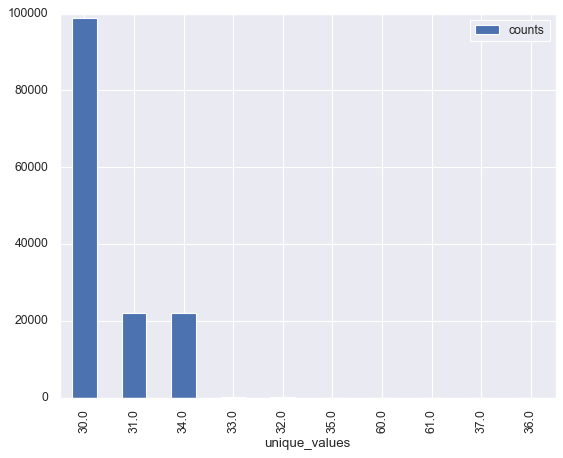

In [19]:
# Plotting Latency (Difference in TimeStamp)

df['Time Diff.'] = df['Timestamp'].diff()
# df.reset_index().plot(x='index', y='Time Diff.', kind = 'line', xlim=(0, len(df)))
val_amount = df['Time Diff.'].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(val_amount)
print(type(val_amount))
val_amount.plot.bar(x='unique_values', y='counts')    

In [24]:
# Checking Counter Variable
df['Counter Diff.'] = df['Counter'].diff()
val_amount = df['Counter Diff.'].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(data[112752:112800])
# print(df.where(df['Counter Diff.'] == 1001.0))
print(df.loc[ df['Counter Diff.'] == 1001.0])
print(val_amount)


KeyError: 112752